In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

f= open("Tresult.txt","w+")


In [18]:
Style_1="Casual"
Style_2="Bohemian"
df = pd.read_excel("Sample - Superstore.xls")
product_A = df.loc[df['Style'] == Style_1]

In [19]:
f.write('This file contailns the minimun date value '+str(product_A['Order Date'].min())+', ')
f.write('and max value of date as '+str(product_A['Order Date'].max())+'\n')


45

In [20]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Dress_ID', 'Style', 'Quantity', 'Discount', 'Profit']
product_A.drop(cols, axis=1, inplace=True)
product_A = product_A.sort_values('Order Date')
product_A.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [21]:
product_A = product_A.groupby('Order Date')['Sales'].sum().reset_index()

In [22]:
product_A

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
5,2014-01-14,61.9600
6,2014-01-16,127.1040
7,2014-01-19,181.4700
8,2014-01-20,1413.5100
9,2014-01-21,25.2480


In [23]:
product_A = product_A.set_index('Order Date')
product_A.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [24]:
y = product_A['Sales'].resample('MS').mean()
#MS        month start frequency



In [25]:
y['2017':]


Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

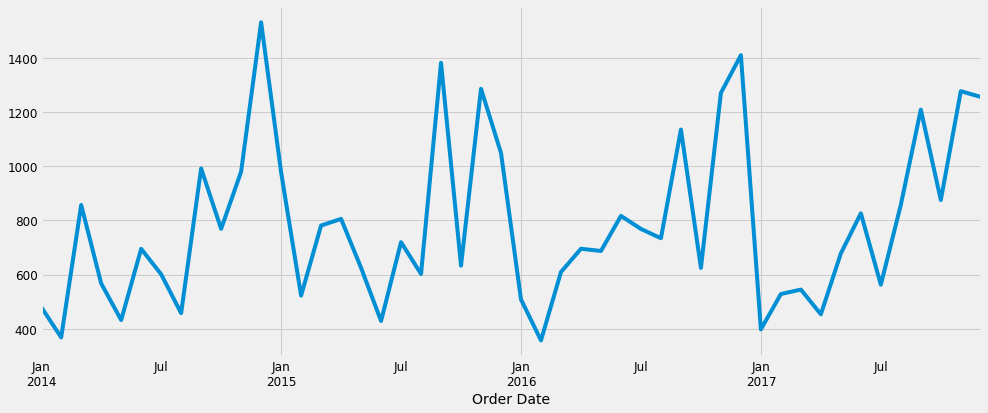

In [26]:
y.plot(figsize=(15, 6), label='Sales')
plt.savefig('graph1.png')
plt.show()

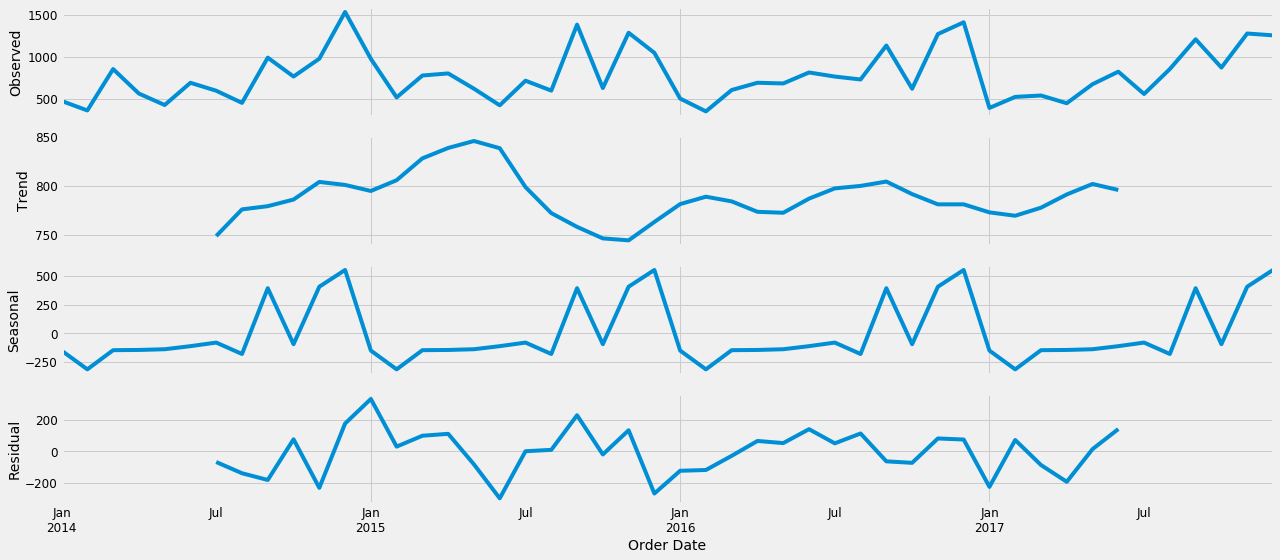

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.savefig('graph2.png')
plt.show()

#f.write('Time Series Components\n')

#f.write('A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematiccomponents.)
        

        
#Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
#Non-Systematic: Components of the time series that cannot be directly modeled.
#A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

#These components are defined as follows:

#Level: The average value in the series.
#Trend: The increasing or decreasing value in the series.
#Seasonality: The repeating short-term cycle in the series.
#Noise: The random variation in the series

#An additive model suggests that the components are added together as follows:


#y(t) = Level + Trend + Seasonality + Noise
#1
#y(t) = Level + Trend + Seasonality + Noise
#An additive model is linear where changes over time are consistently made by the same amount.

#A linear trend is a straight line.

#A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

In [28]:
#We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, 
#which stands for Autoregressive Integrated Moving Average.
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for
#seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1441.1680860554159
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1663.0002395213521
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3173.2110209076936
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5330534520648
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2669.352472891882
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946869


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1596.4963569717474
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1311.5783089071156
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817146
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2754.875317551636
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482808
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442803
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2811.0841858920703
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173517
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1463.3381873229005
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935202


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1315.6568219955236
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084592
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218628
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:730497.8492474257
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815004
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238772786


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2547.9154860937115
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021176573
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


F:\Andaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1390.9134337656665
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658785043
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2082.433103996224
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345414
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835125
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2539.124951108192
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876098116
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.525035466081
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2721.862351490466
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395396106


In [30]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


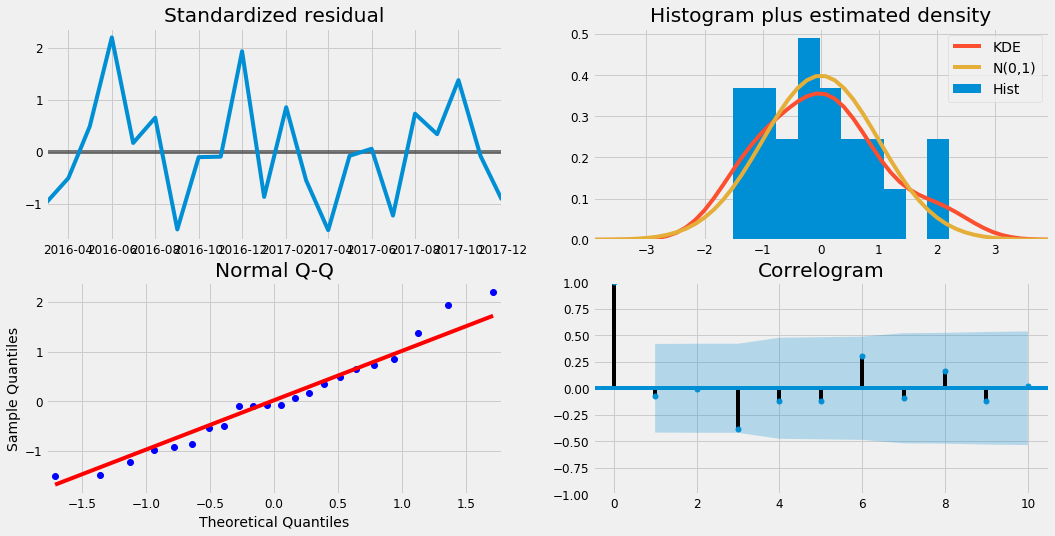

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('graph3.png')
plt.show()

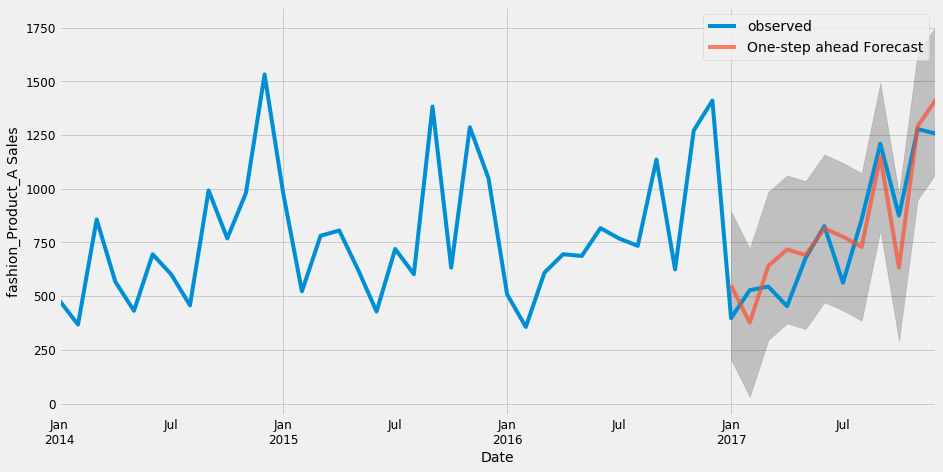

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('fashion_Product_A Sales')
plt.legend()
plt.savefig('graph4.png')
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
f.write('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
f.write('\n')

1

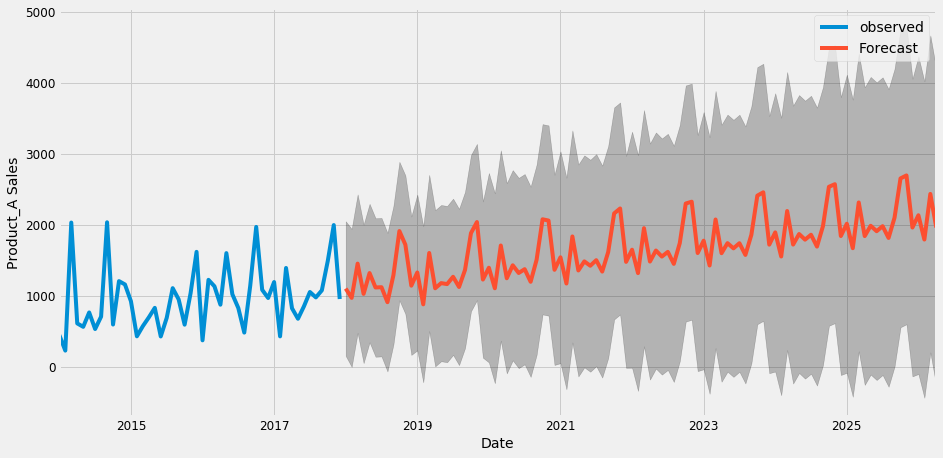

In [48]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product_A Sales')
plt.legend()
plt.savefig('graph4.png')
plt.show()

In [42]:
product_A = df.loc[df['Style'] == Style_1]
product_B = df.loc[df['Style'] == Style_2]
product_A.shape, product_B.shape

((1847, 19), (6026, 19))

In [43]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Dress_ID', 'Style', 'Quantity', 'Discount', 'Profit']
product_A.drop(cols, axis=1, inplace=True)
product_B.drop(cols, axis=1, inplace=True)
product_A = product_A.sort_values('Order Date')
product_B = product_B.sort_values('Order Date')
product_A = product_A.groupby('Order Date')['Sales'].sum().reset_index()
product_B = product_B.groupby('Order Date')['Sales'].sum().reset_index()
product_A = product_A.set_index('Order Date')
product_B = product_B.set_index('Order Date')
y_product_A = product_A['Sales'].resample('MS').mean()
y_product_B = product_B['Sales'].resample('MS').mean()
product_A = pd.DataFrame({'Order Date':y_product_A.index, 'Sales':y_product_A.values})
product_B = pd.DataFrame({'Order Date': y_product_B.index, 'Sales': y_product_B.values})
fashion_store = product_A.merge(product_B, how='inner', on='Order Date')
fashion_store.rename(columns={'Sales_x': 'product_A_sales', 'Sales_y': 'product_B_sales'}, inplace=True)
fashion_store.head()

,Order Date,product_A_sales,product_B_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


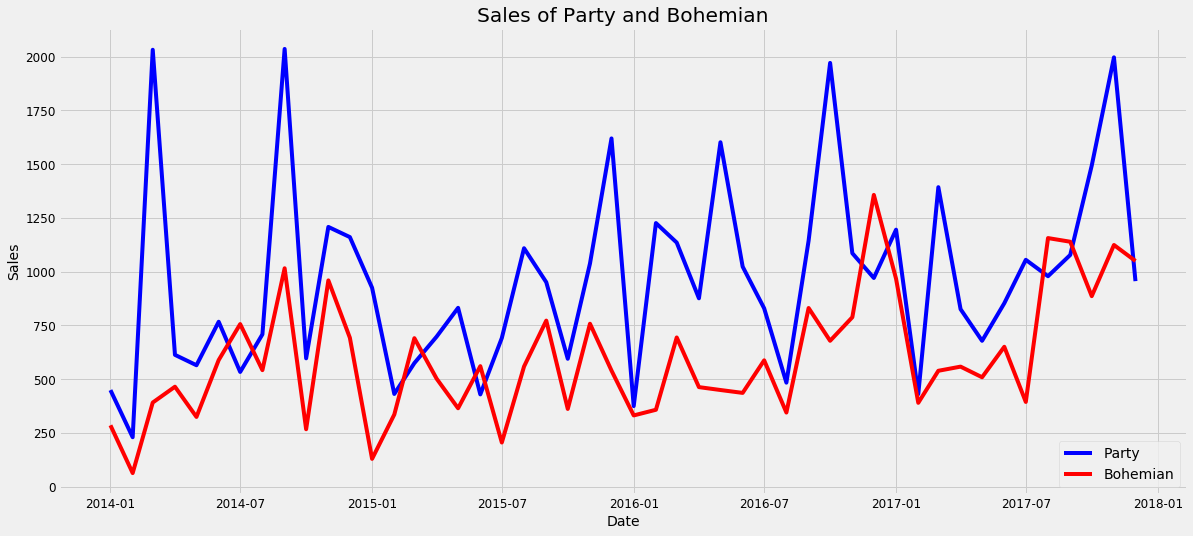

In [44]:

line1=plt.plot(fashion_store['Order Date'], fashion_store['product_A_sales'], 'b-', label = Style_1)
line2=plt.plot(fashion_store['Order Date'], fashion_store['product_B_sales'], 'r-', label = Style_2)
plt.xlabel('Date'); 
plt.ylabel('Sales'); 
plt.title('Sales of '+Style_1+ ' and '+Style_2)
plt.legend(loc='lower right')
plt.savefig('graph6.png')
plt.show();


In [45]:
first_date = fashion_store.ix[np.min(list(np.where(fashion_store['product_B_sales'] > fashion_store['product_A_sales'])[0])), 'Order Date']
f.write('The '+Style_2+' first time produced higher sales than '+Style_1+'is {}.'.format(first_date.date()))

70

In [46]:
f.close()